# 層状k分割交差検証
```{hint}
[sklearn.model_selection.StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score

In [2]:
RND = 777
np.random.seed(RND)

# 表示する文字サイズを調整
plt.rc("font", size=20)
plt.rc("legend", fontsize=16)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)

# youtube動画を表示
import IPython.display

# IPython.display.YouTubeVideo("XXX", width="500px")

# サンプルデータに対してモデルを作成し交差検証
## 実験用データ

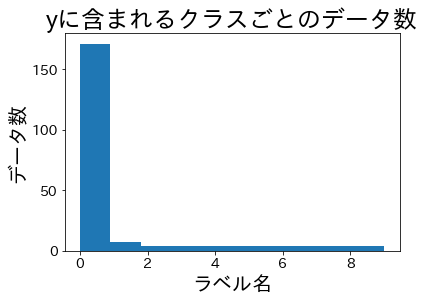

In [3]:
n_classes = 10
X, y = make_classification(
    n_samples=210,
    n_classes=n_classes,
    n_informative=n_classes,
    n_features=12,
    n_clusters_per_class=1,
    weights=[0.82, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02],  # クラスごとの比率
    random_state=RND,
)
plt.title("yに含まれるクラスごとのデータ数")
plt.hist(y)
plt.xlabel("ラベル名")
plt.ylabel("データ数")
plt.show()

# 分割したデータに含まれるラベルの比率
データを4分割して、訓練・検証用データに含まれるラベルの比率を確認します。
## StratifiedKFold
訓練データと検証用データで、ラベルの比率が同じになっていることが確認できます。

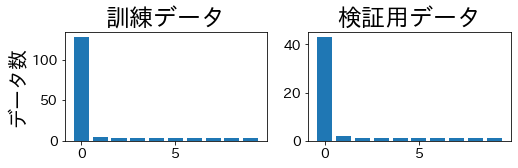

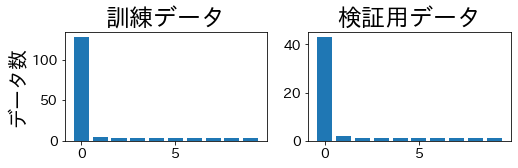

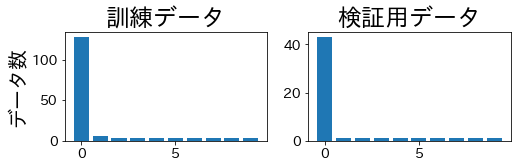

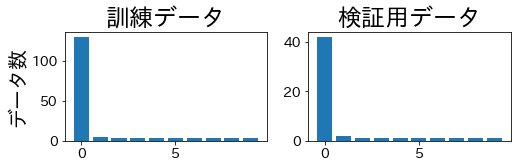

In [4]:
skf = StratifiedKFold(n_splits=4)

for train_index, valid_index in skf.split(X, y):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]
    # model = RandomForestClassifier(max_depth=5, random_state=RND)
    # model.fit(X_train, y_train)

    plt.figure(figsize=(8, 2))
    plt.subplot(121)
    plt.title("訓練データ")
    train_label_cnt = [(y_train == i).sum() for i in range(n_classes)]
    plt.ylabel("データ数")
    plt.bar(np.arange(n_classes), train_label_cnt)
    plt.subplot(122)
    plt.title("検証用データ")
    valid_label_cnt = [(y_valid == i).sum() for i in range(n_classes)]
    plt.bar(np.arange(n_classes), valid_label_cnt)
    plt.show()

## KFold
テストデータにデータが無いクラスがあることが確認できます。

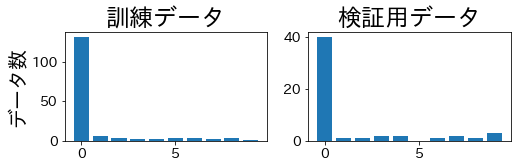

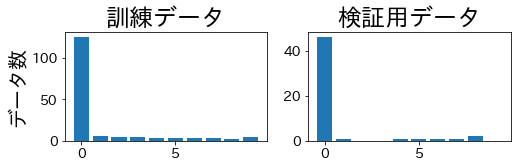

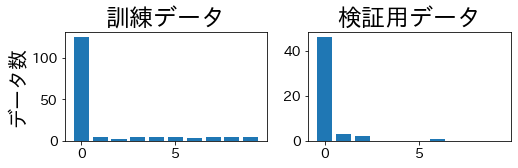

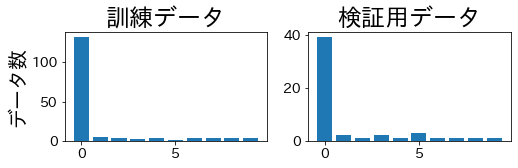

In [5]:
kf = KFold(n_splits=4)

for train_index, valid_index in kf.split(X, y):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]
    # model = RandomForestClassifier(max_depth=5, random_state=RND)
    # model.fit(X_train, y_train)

    plt.figure(figsize=(8, 2))
    plt.subplot(121)
    plt.title("訓練データ")
    train_label_cnt = [(y_train == i).sum() for i in range(n_classes)]
    plt.ylabel("データ数")
    plt.bar(np.arange(n_classes), train_label_cnt)
    plt.subplot(122)
    plt.title("検証用データ")
    valid_label_cnt = [(y_valid == i).sum() for i in range(n_classes)]
    plt.bar(np.arange(n_classes), valid_label_cnt)
    plt.show()